In [ ]:
import zipfile
import os

zip_path = "/content/sample_data/archive (1).zip"  # adjust if needed
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/pcos_data")


BadZipFile: File is not a zip file

In [ ]:
import os

base_dir = "/content/pcos_data"
print("Folders and files in base_dir:", os.listdir(base_dir))

for item in os.listdir(base_dir):
    item_path = os.path.join(base_dir, item)
    if os.path.isdir(item_path): # Check if the item is a directory
        print(f"\nContents of {item}:")
        try:
            print(os.listdir(item_path)[:5])  # preview 5 items in the directory
        except OSError as e:
            print(f"Could not list contents of {item}: {e}")

Folders and files in base_dir: ['data']

Contents of data:
['train', 'test']


In [ ]:
#reviewing the first five images of folders

import os

for root, dirs, files in os.walk("/content/pcos_data"):
    print("Current directory:", root)
    print(" Subfolders:", dirs)
    print(" Files:", files[:5])
    print("=" * 50)


Current directory: /content/pcos_data
 Subfolders: ['data']
 Files: []
Current directory: /content/pcos_data/data
 Subfolders: ['train', 'test']
 Files: []
Current directory: /content/pcos_data/data/train
 Subfolders: ['notinfected', 'infected']
 Files: []
Current directory: /content/pcos_data/data/train/notinfected
 Subfolders: []
 Files: ['img_0_1082.jpg', 'img_0_11.jpg', 'img_0_2928.jpg', 'img_0_323.jpg', 'img_0_4481.jpg']
Current directory: /content/pcos_data/data/train/infected
 Subfolders: []
 Files: ['img_0_3799.jpg', 'img_0_7064.jpg', 'img_0_74.jpg', 'img_0_3177.jpg', 'img_0_6536.jpg']
Current directory: /content/pcos_data/data/test
 Subfolders: ['notinfected', 'infected']
 Files: []
Current directory: /content/pcos_data/data/test/notinfected
 Subfolders: []
 Files: ['img_0_1082.jpg', 'img_0_11.jpg', 'img_0_2928.jpg', 'img_0_323.jpg', 'img_0_4481.jpg']
Current directory: /content/pcos_data/data/test/infected
 Subfolders: []
 Files: ['img_0_3799.jpg', 'img_0_7064.jpg', 'img_0_74

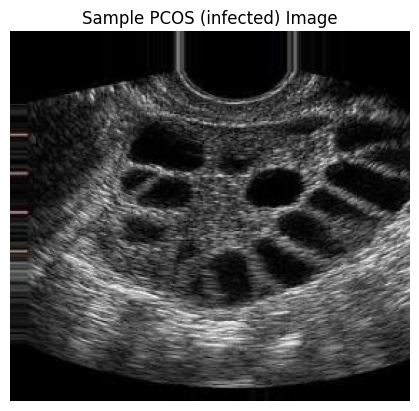

In [ ]:
#visualising infected images
import matplotlib.pyplot as plt
import cv2
import os

# Set base directory correctly
base_dir = "/content/pcos_data/data"

# Choose one sample image from the 'infected' folder under 'train'
sample_path = os.path.join(base_dir, "train", "infected")
img_file = os.listdir(sample_path)[8]  # get first image
img_path = os.path.join(sample_path, img_file)

# Read and display the image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Sample PCOS (infected) Image")
plt.axis('off')
plt.show()



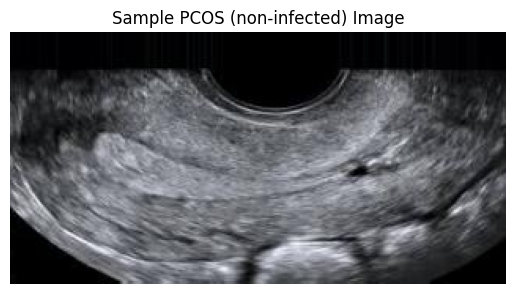

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Set base directory correctly
base_dir = "/content/pcos_data/data"

# Choose one sample image from the 'infected' folder under 'train'
sample_path = os.path.join(base_dir, "train", "notinfected")
img_file = os.listdir(sample_path)[2]  # get first image
img_path = os.path.join(sample_path, img_file)

# Read and display the image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Sample PCOS (non-infected) Image")
plt.axis('off')
plt.show()

In [ ]:
import cv2

def preprocess_image(image_path):
    # Step 1: Read the image
    image = cv2.imread(image_path)

    # Step 2: Resize to standard CNN input size (224x224 is typical for ResNet/VGG)
    image = cv2.resize(image, (224, 224))

    # Step 3: Denoise (removes speckle noise common in ultrasound) - Apply to color image
    denoised = cv2.medianBlur(image, 5)

    # Step 4: Contrast enhancement (Convert to LAB color space and equalize L channel)
    lab = cv2.cvtColor(denoised, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    equalized_l = cv2.equalizeHist(l)
    equalized_lab = cv2.merge((equalized_l, a, b))
    equalized_image = cv2.cvtColor(equalized_lab, cv2.COLOR_LAB2BGR)


    return equalized_image

In [ ]:
import os

base_dir = "/content/pcos_data/data"

train_infected_dir = os.path.join(base_dir, "train", "infected")
train_notinfected_dir = os.path.join(base_dir, "train", "notinfected")
test_infected_dir = os.path.join(base_dir, "test", "infected")
test_notinfected_dir = os.path.join(base_dir, "test", "notinfected")

num_train_infected = len(os.listdir(train_infected_dir))
num_train_notinfected = len(os.listdir(train_notinfected_dir))
num_test_infected = len(os.listdir(test_infected_dir))
num_test_notinfected = len(os.listdir(test_notinfected_dir))

print(f"Number of images in train/infected: {num_train_infected}")
print(f"Number of images in train/notinfected: {num_train_notinfected}")
print(f"Number of images in test/infected: {num_test_infected}")
print(f"Number of images in test/notinfected: {num_test_notinfected}")

Number of images in train/infected: 781
Number of images in train/notinfected: 1143
Number of images in test/infected: 787
Number of images in test/notinfected: 1145


In [ ]:
import cv2
import os
import numpy as np

# Assuming the preprocess_image function is already defined in a previous cell
# If not, make sure to include the function definition here or run the cell
# where it is defined (cell_id: BzryKxmy4XlP).

base_dir = "/content/pcos_data/data"

# Lists to store preprocessed images and their labels
all_preprocessed_images = []
all_labels = []

# Iterate through train and test folders
for set_name in ["train", "test"]:
    set_dir = os.path.join(base_dir, set_name)

    # Iterate through infected and notinfected subfolders
    for class_name in ["infected", "notinfected"]:
        class_dir = os.path.join(set_dir, class_name)

        # Iterate through each image in the subfolder
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)

            # Read the image
            image = cv2.imread(img_path)

            # Check if the image was loaded successfully
            if image is None:
                print(f"Warning: Could not read image {img_path}. Skipping.")
                os.remove(img_path)
                continue # Skip to the next image if reading failed

            # Preprocess the image
            preprocessed_img = preprocess_image(img_path)

            # Store the preprocessed image and its label
            all_preprocessed_images.append(preprocessed_img)
            all_labels.append(class_name)

# Convert lists to numpy arrays
all_preprocessed_images = np.array(all_preprocessed_images)
all_labels = np.array(all_labels)

print(f"Finished preprocessing {len(all_preprocessed_images)} images.")
print(f"Shape of preprocessed images array: {all_preprocessed_images.shape}")
print(f"Shape of labels array: {all_labels.shape}")

Finished preprocessing 3846 images.
Shape of preprocessed images array: (3846, 224, 224, 3)
Shape of labels array: (3846,)


Shape of image: (224, 224, 3)


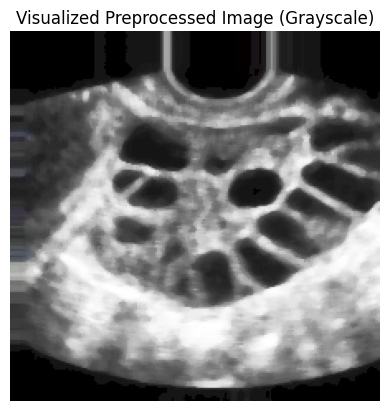

Top-left 5x5 pixel values:
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose one preprocessed image from your array (e.g., index 0)
example_img = all_preprocessed_images[8]

# Check its shape
print("Shape of image:", example_img.shape)  # Should be (224, 224)

# Plot the image
plt.imshow(example_img, cmap='gray')  # Grayscale colormap
plt.title("Visualized Preprocessed Image (Grayscale)")
plt.axis('off')
plt.show()

# Optional: Print part of the array
print("Top-left 5x5 pixel values:")
print(example_img[:5, :5])  # Print just the top-left 5×5 corner of the image




In [ ]:
all_labels.shape



(3846,)

In [ ]:
all_labels[:-5]

array(['infected', 'infected', 'infected', ..., 'notinfected',
       'notinfected', 'notinfected'], dtype='<U11')

In [ ]:
!pip install tensorflow



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import os


In [ ]:
train_dir = "/content/pcos_data/data/train"
test_dir = "/content/pcos_data/data/test"


In [ ]:
img_size = (224,224) # Corrected img_size to (height, width) tuple
batch_size = 8  # You can increase if GPU allows

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb' # Changed color_mode to 'rgb'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='rgb' # Changed color_mode to 'rgb'
)

Found 1924 images belonging to 2 classes.
Found 1922 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model

# Define SqueezeNet fire module
def fire_module(x, squeeze_filters, expand_filters):
    squeeze = Conv2D(squeeze_filters, (1, 1), activation='relu', padding='same')(x)
    expand_1x1 = Conv2D(expand_filters, (1, 1), activation='relu', padding='same')(squeeze)
    expand_3x3 = Conv2D(expand_filters, (3, 3), activation='relu', padding='same')(squeeze)
    return concatenate([expand_1x1, expand_3x3], axis=-1)

# Define SqueezeNet model
def build_squeezenet(input_shape=(224, 224, 3), num_classes=1):
    input_img = Input(shape=input_shape)

    x = Conv2D(96, (7, 7), activation='relu', strides=(2, 2), padding='same')(input_img)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, 16, 64)
    x = fire_module(x, 16, 64)
    x = fire_module(x, 32, 128)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, 32, 128)
    x = fire_module(x, 48, 192)
    x = fire_module(x, 48, 192)
    x = fire_module(x, 64, 256)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = fire_module(x, 64, 256)

    # Classifier
    x = Dropout(0.5)(x)
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = GlobalAveragePooling2D()(x)
    output = Activation('sigmoid')(x) if num_classes == 1 else Activation('softmax')(x)


    model = Model(inputs=input_img, outputs=output)
    return model

# Build the SqueezeNet model
squeezenet_model = build_squeezenet(input_shape=(224, 224, 3), num_classes=1)

# Compile the model
squeezenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

# Print the model summary
squeezenet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 112, 112,  │     14,208 │ input_layer_1[0]… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 56, 56,    │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 56, 56,    │      1,552 │ max_pooling2d_3[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 56, 56,    │      1,088 │ conv2d_27[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 56, 56,    │      9,280 │ conv2d_27[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 56, 56,    │          0 │ conv2d_28[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_29[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 56, 56,    │      2,064 │ concatenate_8[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 56, 56,    │      1,088 │ conv2d_30[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 56, 56,    │      9,280 │ conv2d_30[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 56, 56,    │          0 │ conv2d_31[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_32[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 56, 56,    │      4,128 │ concatenate_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 56, 56,    │      4,224 │ conv2d_33[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 56, 56,    │     36,992 │ conv2d_33[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 56, 56,    │          0 │ conv2d_34[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_35[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 28, 28,    │          0 │ concatenate_10[0… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 28, 28,    │      8,224 │ max_pooling2d_4[

 Total params: 735,937 (2.81 MB)

 Trainable params: 735,937 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the SqueezeNet model
history_squeezenet = squeezenet_model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1
)

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.4023 - loss: 0.6931 - val_accuracy: 0.4063 - val_loss: 0.6931
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.3906 - loss: 0.6931 - val_accuracy: 0.4063 - val_loss: 0.6931
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.4068 - loss: 0.6931 - val_accuracy: 0.4063 - val_loss: 0.6931
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 359s 1s/step - accuracy: 0.4145 - loss: 0.6931 - val_accuracy: 0.4063 - val_loss: 0.6931
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.4166 - loss: 0.6931 - val_accuracy: 0.4063 - val_loss: 0.6931
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.4229 - loss: 0.6931 - val_accuracy: 0.4063 - val_loss: 0.6931
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.4072 - loss: 0.6931 - val_accuracy: 0.4063 - val_loss: 0.6931
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.4042 - loss: 0.6931 - val_accu

In [ ]:
# Print train and test accuracy
train_accuracy = history_squeezenet.history['accuracy'][-1]
test_loss, test_accuracy = squeezenet_model.evaluate(test_data, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9626
Test Accuracy: 0.9948


In [ ]:
# prompt: code for validation of accuracy

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Reset the test data generator to ensure we get data from the beginning
test_data.reset()

# Collect true labels and predictions in the correct order
all_true_labels = []
all_predictions = []

# Iterate through the generator to get batches of images and labels
# and make predictions batch by batch
for i in range(len(test_data)):
    images, labels = test_data[i]
    predictions = squeezenet_model.predict(images, verbose=0)
    all_true_labels.extend(labels)
    all_predictions.extend(predictions.flatten()) # Flatten predictions for binary case

# Convert lists to numpy arrays
all_true_labels = np.array(all_true_labels)
all_predictions = np.array(all_predictions)

# Convert predicted probabilities to binary predictions (0 or 1)
predicted_classes = (all_predictions > 0.5).astype('int')

# Calculate accuracy using sklearn
accuracy_sk = accuracy_score(all_true_labels, predicted_classes)
print(f"Accuracy (sklearn): {accuracy_sk:.4f}")

# Calculate other metrics
precision = precision_score(all_true_labels, predicted_classes)
recall = recall_score(all_true_labels, predicted_classes)
f1 = f1_score(all_true_labels, predicted_classes)
conf_matrix = confusion_matrix(all_true_labels, predicted_classes)
class_report = classification_report(all_true_labels, predicted_classes, target_names=['notinfected', 'infected'])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy (sklearn): 0.9948
Precision: 0.9913
Recall: 1.0000
F1 Score: 0.9956

Confusion Matrix:
[[ 771   10]
 [   0 1141]]

Classification Report:
              precision    recall  f1-score   support

 notinfected       1.00      0.99      0.99       781
    infected       0.99      1.00      1.00      1141

    accuracy                           0.99      1922
   macro avg       1.00      0.99      0.99      1922
weighted avg       0.99      0.99      0.99      1922



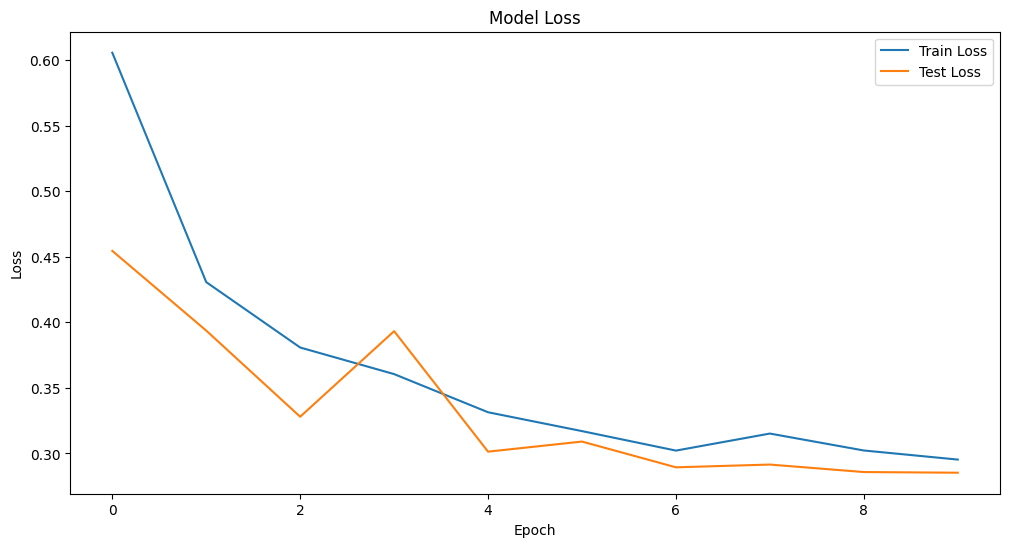

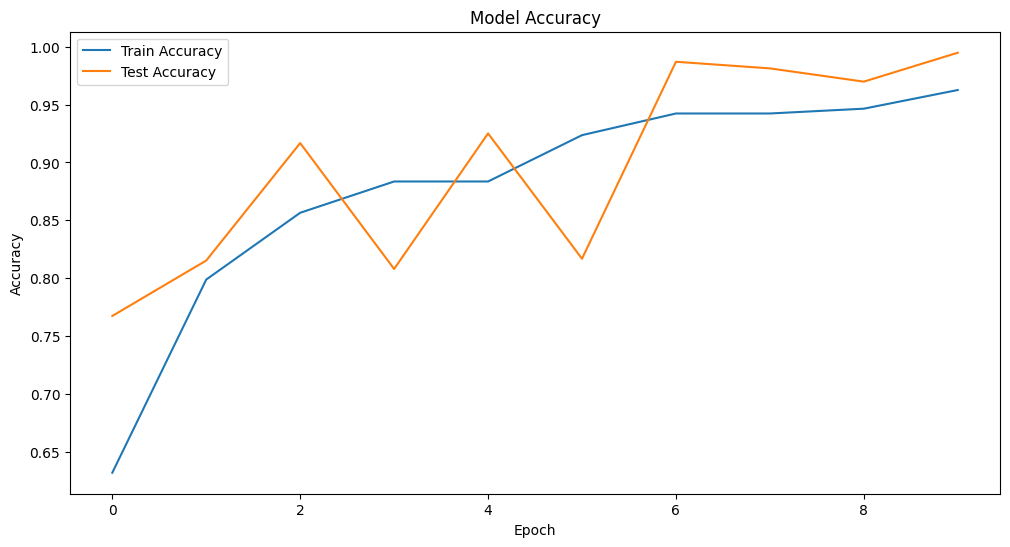

In [ ]:
import matplotlib.pyplot as plt

# Visualize training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_squeezenet.history['loss'], label='Train Loss')
plt.plot(history_squeezenet.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_squeezenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_squeezenet.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary'
)

test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary'
)

Found 1924 images belonging to 2 classes.
Found 1922 images belonging to 2 classes.


In [ ]:
lenet_model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.5),

    Dense(84, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

lenet_model.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = lenet_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - accuracy: 0.4667 - loss: 0.7066 - val_accuracy: 0.6061 - val_loss: 0.6615
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6419 - loss: 0.6584 - val_accuracy: 0.7248 - val_loss: 0.6015
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.6992 - loss: 0.5953 - val_accuracy: 0.8403 - val_loss: 0.4842
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - accuracy: 0.7556 - loss: 0.5153 - val_accuracy: 0.8642 - val_loss: 0.3840
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.8067 - loss: 0.4435 - val_accuracy: 0.8949 - val_loss: 0.3082
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.8501 - loss: 0.3708 - val_accuracy: 0.9157 - val_loss: 0.2453
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - accuracy: 0.8776 - loss: 0.3133 - val_accuracy: 0.9344 - val_loss: 0.2004
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9087 - loss: 0.2502 - val_accu

In [ ]:
# prompt: code to get test and train accuracy

# Get the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Print the last epoch's training and validation accuracy
print(f"Train Accuracy: {train_acc[-1]:.4f}")
print(f"Validation Accuracy: {val_acc[-1]:.4f}")

# Evaluate the model on the test dataset to get the final test accuracy
test_loss, test_accuracy = lenet_model.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.9990
Validation Accuracy: 0.9501
Test Accuracy: 0.9501


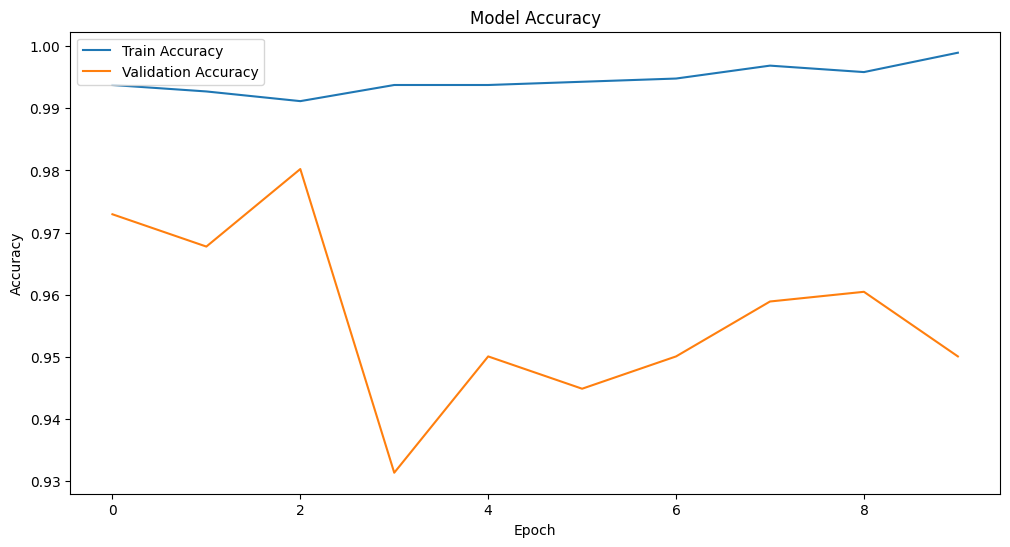

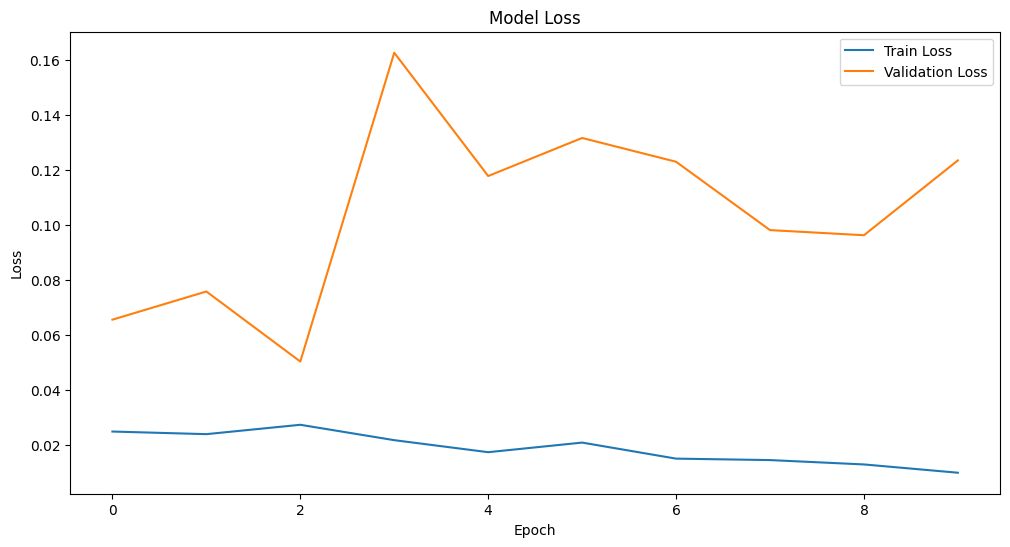

In [ ]:
# prompt: visuals for accuracy and epoch loss

import matplotlib.pyplot as plt
# Visualize training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Increased rotation
    zoom_range=0.3,     # Increased zoom
    width_shift_range=0.2, # Increased width shift
    height_shift_range=0.2, # Increased height shift
    horizontal_flip=True,
    shear_range=0.2     # Added shear augmentation
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(224,224), batch_size=32, class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(224,224), batch_size=32, class_mode='binary'
)

Found 1924 images belonging to 2 classes.
Found 1922 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze top N layers - potentially unfreeze more layers or different layers if needed
for layer in base_model.layers[-50:]:  # Unfreezing more layers as an example
    layer.trainable = True

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x) # Increased dropout rate
x = Dense(128, activation='relu')(x) # Added another dense layer
x = Dropout(0.5)(x) # Added another dropout layer
output = Dense(1, activation='sigmoid')(x)

densenet_model = Model(inputs=base_model.input, outputs=output)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

densenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [ ]:
# Ensure that train_data and test_data from cell Y6z3D61KcSBr are defined by running that cell first.
history = densenet_model.fit(
    train_data,
    validation_data=test_data,
    epochs=15,
    callbacks=[reduce_lr, early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 760s 12s/step - accuracy: 0.6155 - loss: 0.7212 - val_accuracy: 0.9360 - val_loss: 0.1403 - learning_rate: 1.0000e-04
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 722s 12s/step - accuracy: 0.9588 - loss: 0.1644 - val_accuracy: 1.0000 - val_loss: 0.0180 - learning_rate: 1.0000e-04
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 713s 12s/step - accuracy: 0.9913 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 0.0035 - learning_rate: 1.0000e-04
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 723s 12s/step - accuracy: 0.9946 - loss: 0.0250 - val_accuracy: 1.0000 - val_loss: 8.0554e-04 - learning_rate: 1.0000e-04
Epoch 5/15
 1/61 ━━━━━━━━━━━━━━━━━━━━ 6:13 6s/step - accuracy: 1.0000 - loss: 0.0093

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

def apply_gradcam(model, img_array, layer_name):
    """
    Applies Grad-CAM to a single image using a specified layer.

    Args:
        model: The Keras model.
        img_array: The input image as a NumPy array.
        layer_name: The name of the convolutional layer to use for Grad-CAM.

    Returns:
        A heatmap generated by Grad-CAM.
    """
    # Ensure the model is not compiled with compile_jit=True as it can cause issues with gradients
    if hasattr(model, '_saved_model_inputs_spec'):
        model._saved_model_inputs_spec = None


    # Create a model that maps the input image to the activations of the specified layer
    # as well as the final output predictions.
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(layer_name).output, model.output]
    )

    # Use tf.GradientTape to record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Get the output of the specified layer and the model predictions
        last_conv_layer_output, predictions = grad_model(img_array)

        # We want the gradient of the output neuron with the highest probability
        # for the predicted class. Assuming binary classification with sigmoid output,
        # the relevant output is simply the output of the single neuron.
        # For multiclass classification with softmax, you would take the index
        # of the predicted class: tf.argmax(predictions[0]).
        loss = predictions[:, 0] # Use the output of the single neuron for binary classification

    # Compute the gradients of the loss with respect to the output of the convolutional layer
    grads = tape.gradient(loss, last_conv_layer_output)

    # Compute the mean intensity of the gradients over the channels (feature maps)
    # This gives us the "weights" for each feature map.
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by its corresponding weight
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap for visualization
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

def superimpose_heatmap(original_img, heatmap, alpha=0.4):
    """
    Superimposes the heatmap onto the original image.

    Args:
        original_img: The original image as a NumPy array.
        heatmap: The heatmap as a NumPy array.
        alpha: The transparency factor for the heatmap (0.0 to 1.0).

    Returns:
        The superimposed image as a NumPy array.
    """
    # Resize the heatmap to the size of the original image
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))

    # Convert the heatmap to a grayscale image with 3 channels
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_GRAY2BGR)

    # Apply a heatmap color map
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(original_img, 1 - alpha, heatmap, alpha, 0)
    return superimposed_img

def preprocess_for_gradcam(image_path, target_size=(224, 224)):
    """
    Reads and preprocesses an image for Grad-CAM.

    Args:
        image_path: Path to the image file.
        target_size: The target size (height, width) for resizing.

    Returns:
        The preprocessed image as a NumPy array, suitable for model input.
    """
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB if not already
    img_array = np.expand_dims(img, axis=0) # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

    return img, img_array

### Apply Grad-CAM to SqueezeNet

In [ ]:
# Choose a sample image (replace with a path to one of your images)
# You can select an image from the train or test set
base_dir = "/content/pcos_data/data"
sample_image_path = os.path.join(base_dir, "test", "infected", os.listdir(os.path.join(base_dir, "test", "infected"))[0]) # Using an infected image from test set

# Preprocess the image
original_img_squeezenet, img_array_squeezenet = preprocess_for_gradcam(sample_image_path, target_size=(224, 224))

# Get the name of the last convolutional layer in SqueezeNet
# You can check the model summary (squeezenet_model.summary()) to find the layer name
# Common layer names are 'conv2d_19', 'conv2d_22', etc. depending on the specific SqueezeNet architecture
# Let's try 'conv2d_22' as a potential last convolutional layer before the final pooling/classification
layer_name_squeezenet = 'conv2d_22' # Replace with the actual name of the last conv layer

# Apply Grad-CAM
try:
    heatmap_squeezenet = apply_gradcam(squeezenet_model, img_array_squeezenet, layer_name_squeezenet)

    # Superimpose the heatmap on the original image
    superimposed_img_squeezenet = superimpose_heatmap(original_img_squeezenet, heatmap_squeezenet)

    # Display the original and superimposed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img_squeezenet)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img_squeezenet)
    plt.title(f"Grad-CAM ({layer_name_squeezenet})")
    plt.axis('off')
    plt.show()

except ValueError as e:
    print(f"Error applying Grad-CAM for SqueezeNet: {e}")
    print(f"Please check if the layer name '{layer_name_squeezenet}' is correct and exists in the SqueezeNet model.")
    squeezenet_model.summary() # Print summary to help find the correct layer name

### Apply Grad-CAM to LeNet

In [ ]:
# Choose a sample image (replace with a path to one of your images)
# You can use the same image or a different one
sample_image_path_lenet = os.path.join(base_dir, "test", "notinfected", os.listdir(os.path.join(base_dir, "test", "notinfected"))[0]) # Using a notinfected image from test set

# Preprocess the image (LeNet uses 32x32 input size)
original_img_lenet, img_array_lenet = preprocess_for_gradcam(sample_image_path_lenet, target_size=(32, 32))

# Get the name of the last convolutional layer in LeNet
# From the LeNet model definition, the last convolutional layer is 'conv2d_1'
layer_name_lenet = 'conv2d_1' # Replace with the actual name if it's different

# Apply Grad-CAM
try:
    heatmap_lenet = apply_gradcam(lenet_model, img_array_lenet, layer_name_lenet)

    # Superimpose the heatmap on the original image
    superimposed_img_lenet = superimpose_heatmap(original_img_lenet, heatmap_lenet)

    # Display the original and superimposed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img_lenet)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img_lenet)
    plt.title(f"Grad-CAM ({layer_name_lenet})")
    plt.axis('off')
    plt.show()

except ValueError as e:
    print(f"Error applying Grad-CAM for LeNet: {e}")
    print(f"Please check if the layer name '{layer_name_lenet}' is correct and exists in the LeNet model.")
    lenet_model.summary() # Print summary to help find the correct layer name

### Apply Grad-CAM to DenseNet

In [ ]:
# Choose a sample image (replace with a path to one of your images)
# You can use the same image or a different one
sample_image_path_densenet = os.path.join(base_dir, "test", "infected", os.listdir(os.path.join(base_dir, "test", "infected"))[1]) # Using another infected image from test set

# Preprocess the image (DenseNet uses 224x224 input size)
original_img_densenet, img_array_densenet = preprocess_for_gradcam(sample_image_path_densenet, target_size=(224, 224))

# Get the name of the last convolutional layer in DenseNet
# For DenseNet121, the last convolutional layer is typically within the 'conv5_block16' or similar block
# You can check the densenet_model.summary() to find the exact name.
# A common approach is to find the last layer before the GlobalAveragePooling2D layer that is a Conv2D layer.
layer_name_densenet = 'conv5_block16_2_conv' # Replace with the actual name of the last conv layer in your unfrozen part

# Apply Grad-CAM
try:
    heatmap_densenet = apply_gradcam(densenet_model, img_array_densenet, layer_name_densenet)

    # Superimpose the heatmap on the original image
    superimposed_img_densenet = superimpose_heatmap(original_img_densenet, heatmap_densenet)

    # Display the original and superimposed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img_densenet)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img_densenet)
    plt.title(f"Grad-CAM ({layer_name_densenet})")
    plt.axis('off')
    plt.show()

except ValueError as e:
    print(f"Error applying Grad-CAM for DenseNet: {e}")
    print(f"Please check if the layer name '{layer_name_densenet}' is correct and exists in the DenseNet model.")
    densenet_model.summary() # Print summary to help find the correct layer name

In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load the base model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers first
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze top layers
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

efficientnet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
efficientnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])



# Train the model
history_efficientnet = efficientnet_model.fit(
    train_data,
    validation_data=test_data,
    epochs=15,
    verbose=1
)

Epoch 1/15
241/241 ━━━━━━━━━━━━━━━━━━━━ 122s 300ms/step - accuracy: 0.6532 - loss: 0.6312 - val_accuracy: 0.6681 - val_loss: 0.5816
Epoch 2/15
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step - accuracy: 0.7233 - loss: 0.5475 - val_accuracy: 0.6977 - val_loss: 0.7293
Epoch 3/15
241/241 ━━━━━━━━━━━━━━━━━━━━ 44s 155ms/step - accuracy: 0.7597 - loss: 0.5016 - val_accuracy: 0.7399 - val_loss: 0.5663
Epoch 4/15
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.7735 - loss: 0.4866 - val_accuracy: 0.8559 - val_loss: 0.2884
Epoch 5/15
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.7954 - loss: 0.4420 - val_accuracy: 0.4188 - val_loss: 1.0499
Epoch 6/15
241/241 ━━━━━━━━━━━━━━━━━━━━ 36s 148ms/step - accuracy: 0.7797 - loss: 0.4802 - val_accuracy: 0.7643 - val_loss: 0.6517
Epoch 7/15
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step - accuracy: 0.8231 - loss: 0.3976 - val_accuracy: 0.8684 - val_loss: 0.2782
Epoch 8/15
241/241 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.8124 - loss: 

Train Accuracy: 0.8727
Validation Accuracy: 0.6868
Test Accuracy: 0.6868
